In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


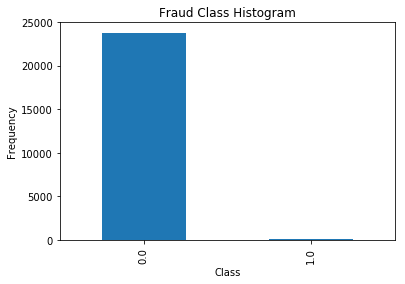

In [12]:
classes= pd.value_counts(data['Class'],sort = True).sort_index()
classes.plot(kind = 'bar')
plt.title('Fraud Class Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [13]:
X = data.ix[: , data.columns != 'Class']
Y = data.ix[: , data.columns == 'Class']
number_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)
normal_indices = data[data.Class == 0].index
random_normal_indices = np.random.choice(normal_indices, number_fraud, replace=False)

random_normal_indices = np.array(random_normal_indices)
undersample_indices = np.concatenate([fraud_indices,random_normal_indices])
undersample_data = data.iloc[undersample_indices, :]

x_undersample = undersample_data.ix[:,undersample_data.columns != 'Class']
y_undersample = undersample_data.ix[:,undersample_data.columns == 'Class']

print('Percentage of normal transactions:',len(undersample_data[undersample_data.Class == 0])/len(undersample_data))
print('Percentage of fraud transactions:',len(undersample_data[undersample_data.Class==1])/len(undersample_data))
print('Total number of transactions:',len(undersample_data))

Percentage of normal transactions: 0.5
Percentage of fraud transactions: 0.5
Total number of transactions: 176


/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':


In [14]:
from sklearn.preprocessing import StandardScaler

data['normAmount']= StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [15]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

In [57]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  16700
Number transactions test dataset:  7158
Total number of transactions:  23858


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [36]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ',iteration ,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [37]:
best_c = printing_Kfold_scores(x_undersample,y_undersample)

/root/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.972222222222
Iteration  2 : recall score =  0.828571428571
Iteration  3 : recall score =  0.470588235294
Iteration  4 : recall score =  0.0
Iteration  5 : recall score =  0.0

Mean recall score  0.454276377218

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  1.0
Iteration  2 : recall score =  0.857142857143
Iteration  3 : recall score =  0.647058823529
Iteration  4 : recall score =  0.0
Iteration  5 : recall score =  0.0

Mean recall score  0.500840336134

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  1.0
Iteration  2 : recall score =  0.857142857143
Iteration  3 : recall score =  0.882352941176
Iteration  4 : recall score =  0.0
Iteration  5 : recall score =  0.0

Mean 

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [42]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontal_alignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  1.0
Confusion matrix, without normalization
[[88  0]
 [ 0 88]]


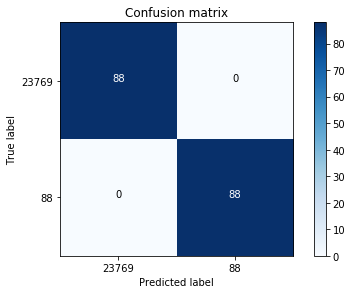

In [58]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(x_undersample,y_undersample.values.ravel())
y_pred_undersample = lr.predict(x_undersample.values)

cnf_matrix = confusion_matrix(y_undersample,y_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, title='Confusion matrix')
plt.show()

In [59]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(x_undersample,y_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(x_undersample,y_undersample.values.ravel()).decision_function(x_undersample.values)

fpr, tpr, thresholds = roc_curve(y_undersample.values.ravel(),y_undersample)
roc_auc = auc(fpr,tpr)

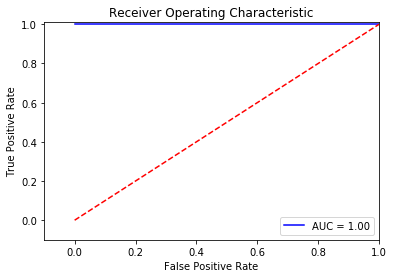

In [62]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.266666666667
Iteration  2 : recall score =  0.666666666667
Iteration  3 : recall score =  0.777777777778
Iteration  4 : recall score =  0.411764705882
Iteration  5 : recall score =  0.461538461538

Mean recall score  0.516882855706

-------------------------------------------
C parameter:  0.1
-------------------------------------------



/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration  1 : recall score =  0.4
Iteration  2 : recall score =  0.666666666667
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.529411764706
Iteration  5 : recall score =  0.615384615385

Mean recall score  0.642292609351

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.466666666667
Iteration  2 : recall score =  0.833333333333
Iteration  3 : recall score =  0.777777777778
Iteration  4 : recall score =  0.705882352941
Iteration  5 : recall score =  0.615384615385

Mean recall score  0.679808949221

-------------------------------------------
C parameter:  10
-------------------------------------------

Iteration  1 : recall score =  0.533333333333
Iteration  2 : recall score =  0.833333333333
Iteration  3 : recall score =  0.777777777778
Iteration  4 : recall score =  0.705882352941
Iteration  5 : recall score =  0.615384615385

Mean recall score  0.693142282554

-------------

In [64]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_undersample = lr.predict(X_test.values)
cnf_matrix = confusion_matrix(y_test,y_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Recall metric in the testing dataset:  1.0
Confusion matrix, without normalization
[[ 0 88]
 [ 0 88]]
Recall metric in the testing dataset:  0.977272727273
Confusion matrix, without normalization
[[48 40]
 [ 2 86]]
Recall metric in the testing dataset:  0.920454545455
Confusion matrix, without normalization
[[64 24]
 [ 7 81]]
Recall metric in the testing dataset:  0.897727272727
Confusion matrix, without normalization
[[75 13]
 [ 9 79]]
Recall metric in the testing dataset:  0.863636363636
Confusion matrix, without normalization
[[84  4]
 [12 76]]
Recall metric in the testing dataset:  0.852272727273
Confusion matrix, without normalization
[[87  1]
 [13 75]]
Recall metric in the testing dataset:  0.806818181818
Confusion matrix, without normalization
[[88  0]
 [17 71]]
Recall metric in the testing dataset:  0.647727272727
Confusion matrix, without normalization
[[88  0]
 [31 57]]
Recall metric in the testing dataset:  0.5
Confusion matrix, without normalization
[[88  0]
 [44 44]]


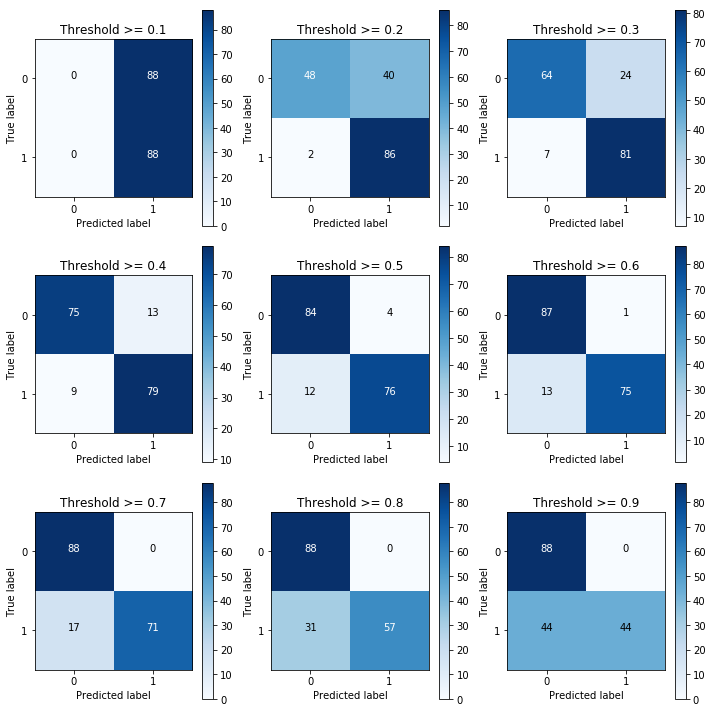

In [68]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(x_undersample,y_undersample.values.ravel())
y_undersample_proba = lr.predict_proba(x_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

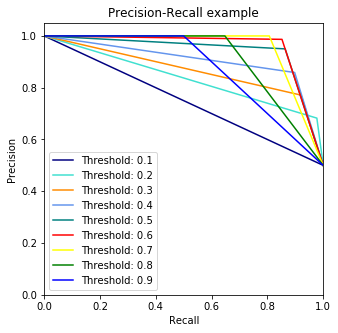

In [72]:
from itertools import cycle

lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(x_undersample,y_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(x_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_undersample,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")